In [117]:
import pandas as pd
import glob
import os
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns


import libraries 

In [118]:
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join(r"C:\Users\user\Desktop\Cyclistics\bikedata", "*.csv"))))

read all csv files and merge as one dataframe

In [119]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.90,-87.70,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.90,-87.70,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.90,-87.70,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.90,-87.70,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.90,-87.70,41.90,-87.70,casual


In [120]:
df.shape

(5595063, 13)

In [121]:
df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    690809
start_station_id      690806
end_station_name      739170
end_station_id        739170
start_lat                  0
start_lng                  0
end_lat                 4771
end_lng                 4771
member_casual              0
dtype: int64

checking the sum of missing values in the dataframe

In [122]:
cycdf = df[["ride_id", "rideable_type", "started_at", "ended_at", "member_casual"]]
cycdf

,ride_id,rideable_type,started_at,ended_at,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,casual
...,...,...,...,...,...
247535,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,casual
247536,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,member
247537,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,member
247538,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,member


selected important columns which will be used for my analysis

In [123]:
cycdf.rename(columns={'member_casual':'rider_type'}, inplace = True)
cycdf

C:\Users\user\AppData\Local\Temp\ipykernel_11872\3982032835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cycdf.rename(columns={'member_casual':'rider_type'}, inplace = True)


,ride_id,rideable_type,started_at,ended_at,rider_type
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,casual
...,...,...,...,...,...
247535,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,casual
247536,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,member
247537,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,member
247538,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,member


changed member_casual column to rider_type

In [124]:
cycdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 0 to 247539
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   ride_id        object
 1   rideable_type  object
 2   started_at     object
 3   ended_at       object
 4   rider_type     object
dtypes: object(5)
memory usage: 256.1+ MB


In [125]:
cycdf['started_at'] = cycdf['started_at'].astype('datetime64')
cycdf['ended_at'] = cycdf['ended_at'].astype('datetime64')
cycdf.info()
cycdf.head()

C:\Users\user\AppData\Local\Temp\ipykernel_11872\802730369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cycdf['started_at'] = cycdf['started_at'].astype('datetime64')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 0 to 247539
Data columns (total 5 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        object        
 1   rideable_type  object        
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   rider_type     object        
dtypes: datetime64[ns](2), object(3)
memory usage: 256.1+ MB


C:\Users\user\AppData\Local\Temp\ipykernel_11872\802730369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cycdf['ended_at'] = cycdf['ended_at'].astype('datetime64')


,ride_id,rideable_type,started_at,ended_at,rider_type
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,casual


Coverting datatype of "started_at" & "ended_at" columns to "datetime64" type.

In [126]:
cycdf = cycdf.assign(ride_length = (cycdf['ended_at'] - cycdf['started_at']) / dt.timedelta(minutes=1))

cycdf.head()

,ride_id,rideable_type,started_at,ended_at,rider_type,ride_length
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,member,10.42
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,member,4.07
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,member,1.33
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,member,11.70
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,casual,0.72


In [127]:
cycdf.sort_values(by = 'ride_length')


,ride_id,rideable_type,started_at,ended_at,rider_type,ride_length
56721,7CA158F5F050156E,electric_bike,2021-11-07 01:58:08,2021-11-07 01:00:06,casual,-58.03
142091,FD8AF7324ABAE9DA,electric_bike,2021-11-07 01:56:51,2021-11-07 01:00:57,casual,-55.90
125855,508B09A5FB0737DC,classic_bike,2021-11-07 01:54:50,2021-11-07 01:00:45,member,-54.08
260820,6F9E76F5EDAAC1B8,electric_bike,2021-11-07 01:55:42,2021-11-07 01:01:55,member,-53.78
282673,7AECC76D1562B51C,classic_bike,2021-11-07 01:54:58,2021-11-07 01:01:29,casual,-53.48
...,...,...,...,...,...,...
640346,99415B003B7E7EEE,docked_bike,2021-07-08 19:29:49,2021-08-11 21:56:58,casual,49107.15
81713,E6E1E5BFFD72ECEC,docked_bike,2021-06-05 23:33:51,2021-07-12 13:55:14,casual,52701.38
46321,BDA1217EC8532C7B,docked_bike,2021-05-02 02:56:07,2021-06-08 13:37:43,casual,53921.60
545476,7F0578ABF030FC83,docked_bike,2021-06-04 22:03:33,2021-07-13 14:15:14,casual,55691.68


 Sorting Values by "ride_length" column in Ascending order.


In [128]:
cycdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 0 to 247539
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        object        
 1   rideable_type  object        
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   rider_type     object        
 5   ride_length    float64       
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 298.8+ MB


In [129]:
len(cycdf[cycdf['ride_length'] < 0])


147

checking for number of ride lengths in negative.

In [130]:
cycdf = cycdf[cycdf['ride_length'] >= 0]
cycdf.info()
cycdf.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5594916 entries, 0 to 247539
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        object        
 1   rideable_type  object        
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   rider_type     object        
 5   ride_length    float64       
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 298.8+ MB


,ride_id,rideable_type,started_at,ended_at,rider_type,ride_length
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,member,10.42
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,member,4.07
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,member,1.33
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,member,11.70
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,casual,0.72


In [131]:
cycdf = cycdf.assign(trip_month = cycdf['started_at'].dt.strftime("%B"), 
trip_day = cycdf['started_at'].dt.strftime("%A"))
cycdf.info()
cycdf.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5594916 entries, 0 to 247539
Data columns (total 8 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        object        
 1   rideable_type  object        
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   rider_type     object        
 5   ride_length    float64       
 6   trip_month     object        
 7   trip_day       object        
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 384.2+ MB


,ride_id,rideable_type,started_at,ended_at,rider_type,ride_length,trip_month,trip_day
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,member,10.42,January,Saturday
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,member,4.07,January,Wednesday
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,member,1.33,January,Thursday
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,member,11.70,January,Thursday
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,casual,0.72,January,Saturday


In [132]:
cycdf['ride_length'].describe()/60

count   93248.60
mean        0.37
std         2.97
min         0.00
25%         0.11
50%         0.20
75%         0.36
max       932.40
Name: ride_length, dtype: float64

In [133]:
cycdf.groupby(['rider_type'])['ride_length'].mean()

rider_type
casual   32.00
member   13.63
Name: ride_length, dtype: float64

In [134]:
cycdf.groupby(['rider_type','trip_day'])['ride_length'].mean()

rider_type  trip_day 
casual      Friday      30.35
            Monday      31.88
            Saturday    34.71
            Sunday      37.57
            Thursday    27.70
            Tuesday     27.97
            Wednesday   27.66
member      Friday      13.32
            Monday      13.25
            Saturday    15.26
            Sunday      15.66
            Thursday    12.78
            Tuesday     12.79
            Wednesday   12.82
Name: ride_length, dtype: float64

In [135]:
cycdf.groupby(['rider_type','trip_day'])['ride_id'].count()


rider_type  trip_day 
casual      Friday       364075
            Monday       286373
            Saturday     557994
            Sunday       481104
            Thursday     286064
            Tuesday      274388
            Wednesday    278948
member      Friday       446423
            Monday       416204
            Saturday     433041
            Sunday       376117
            Thursday     451520
            Tuesday      465509
            Wednesday    477156
Name: ride_id, dtype: int64

Average Number of Rides by Day: Members vs. Casual Riders

In [136]:
cycdf.groupby(['rider_type','trip_month'])['ride_id'].count()

rider_type  trip_month
casual      April         136601
            August        412662
            December       69738
            February       10131
            January        18117
            July          442048
            June          370678
            March          84032
            May           256916
            November      106898
            October       257242
            September     363883
member      April         200624
            August        391661
            December      177802
            February       39491
            January        78715
            July          380349
            June          358912
            March         144462
            May           274715
            November      253027
            October       373984
            September     392228
Name: ride_id, dtype: int64

Average Number of Rides by Month: Members vs. Casual Riders

In [185]:
cycdf.groupby(['rider_type'])['ride_id'].count()

rider_type
casual    2528946
member    3065970
Name: ride_id, dtype: int64

[Text(0.5, 1.0, 'Total Number of Rides for the Year: Member vs Casual'),
 Text(0.5, 0, 'Rider Type'),
 Text(0, 0.5, 'Total Rides')]

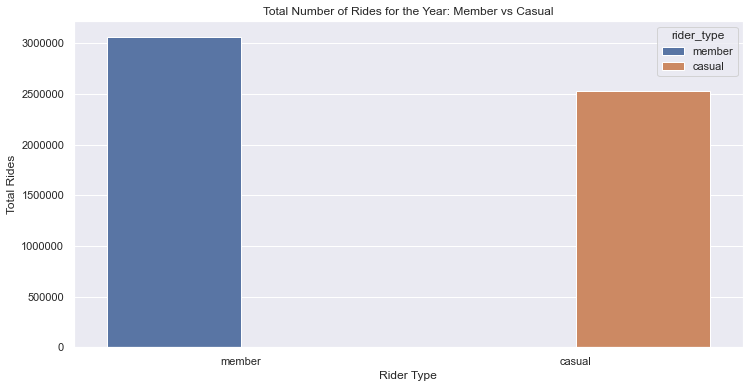

In [198]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,6))
plt.ticklabel_format(style='plain', axis='y')
ax = sns.countplot(x="rider_type", hue="rider_type", data=cycdf)
ax.set(title="Total Number of Rides for the Year: Member vs Casual", xlabel = "Rider Type", ylabel = "Total Rides")


[Text(0.5, 1.0, 'Average Rides per Day: Member vs Casual'),
 Text(0.5, 0, 'Days'),
 Text(0, 0.5, 'AVG Number of Rides')]

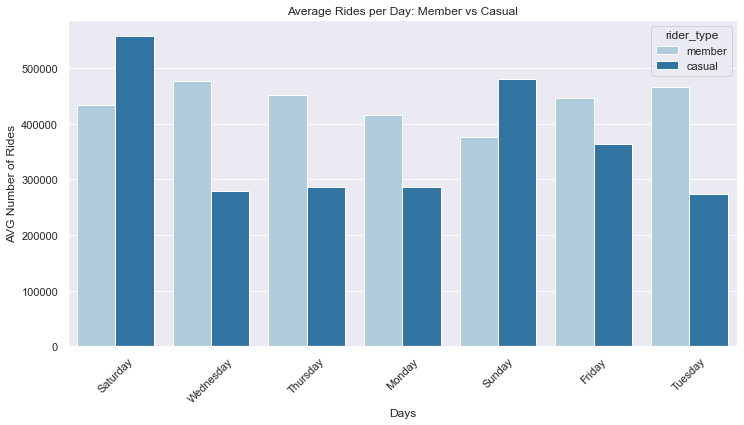

In [206]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,6))
ax = sns.countplot(x="trip_day", hue="rider_type", data=cycdf, palette='Paired')
ax.tick_params(axis='x', rotation=45)
ax.set(title="Average Rides per Day: Member vs Casual", xlabel = "Days", ylabel = "AVG Number of Rides")


[Text(0.5, 1.0, 'Average Rides per Month: Member vs Casual'),
 Text(0.5, 0, 'Months'),
 Text(0, 0.5, 'AVG Number of Rides')]

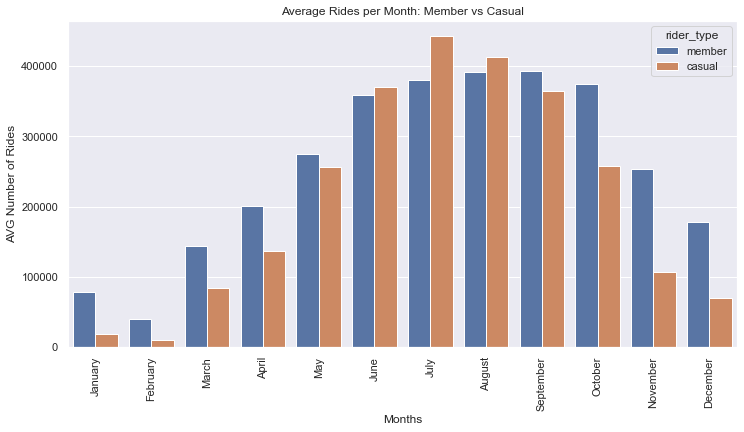

In [169]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,6))
ax = sns.countplot(x="trip_month", hue="rider_type", data=cycdf)
ax.tick_params(axis='x', rotation=90)
ax.set(title="Average Rides per Month: Member vs Casual", xlabel = "Months", ylabel = "AVG Number of Rides")


[Text(0.5, 1.0, 'Daily Ride Peak Hours: Member vs Casual'),
 Text(0.5, 0, 'Hours'),
 Text(0, 0.5, 'Number of Rides')]

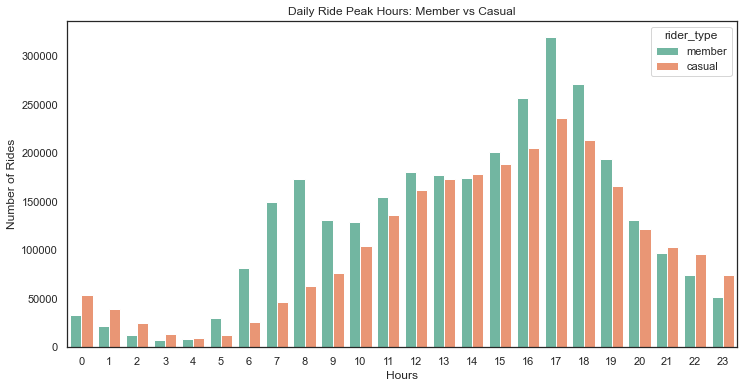

In [203]:
hour_df = cycdf.copy(deep=True)
hour_df['hour'] = hour_df.started_at.apply(lambda x: x.hour)

sns.set_theme(style="white")
plt.figure(figsize=(12,6))
ax = sns.countplot(x='hour', hue='rider_type', data=hour_df, palette='Set2')
ax.set(title="Daily Ride Peak Hours: Member vs Casual", xlabel = "Hours", ylabel = "Number of Rides")


daily peak hours for rides: Casual vs Member

In [162]:
leng = hour_df.groupby(['rider_type','trip_day'])['ride_length'].mean().reset_index()
leng

,rider_type,trip_day,ride_length
0,casual,Friday,30.35
1,casual,Monday,31.88
2,casual,Saturday,34.71
3,casual,Sunday,37.57
4,casual,Thursday,27.70
5,casual,Tuesday,27.97
6,casual,Wednesday,27.66
7,member,Friday,13.32
8,member,Monday,13.25
9,member,Saturday,15.26


[Text(0.5, 1.0, 'Average Ride Length by Days: Member vs Casual'),
 Text(0.5, 0, 'Days'),
 Text(0, 0.5, 'Ride Length in Minutes')]

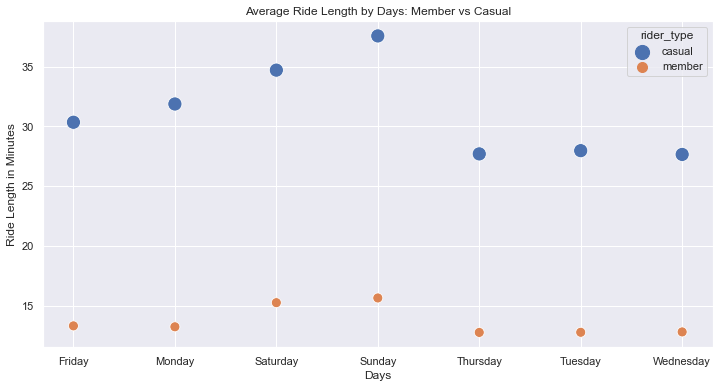

In [200]:
plt.figure(figsize=(12,6))
ax = sns.scatterplot(data=leng, x="trip_day", y="ride_length", hue="rider_type", sizes=(100, 200), legend="full", size="rider_type")
ax.set(title="Average Ride Length by Days: Member vs Casual", xlabel = "Days", ylabel = "Ride Length in Minutes")

In [154]:
hour_df.head()

,ride_id,rideable_type,started_at,ended_at,rider_type,ride_length,trip_month,trip_day,hour
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,member,10.42,January,Saturday,16
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,member,4.07,January,Wednesday,18
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,member,1.33,January,Thursday,22
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,member,11.70,January,Thursday,13
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,casual,0.72,January,Saturday,2
